In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [11]:
data = pd.read_csv("../Data/CustomersCleaned.csv")

In [12]:
import numpy as np
import pandas as pd


class KMeans_Clustering:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def fit(self, data):
        if isinstance(data, pd.DataFrame):
            data = data.select_dtypes(include=[np.number]).values.astype(float)
        else:
            data = data.astype(float)

        if self.random_state is not None:
            np.random.seed(self.random_state)

        initial_indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        self.centroids = data[initial_indices]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array(
                [data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)]
            )

            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        self.inertia_ = np.sum((data - self.centroids[self.labels]) ** 2)

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.select_dtypes(include=[np.number]).values

        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)




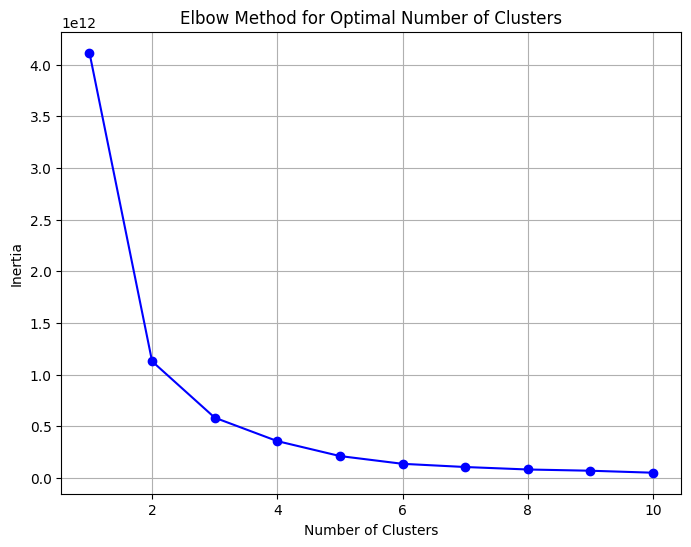

In [13]:
inertia = []
num_clusters = range(1, 11)

for k in num_clusters:
    kmeans = KMeans_Clustering(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker="o", linestyle="-", color="b")
plt.grid(True)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
kmeans = KMeans_Clustering(n_clusters=3, random_state=42)
kmeans.fit(data)
data["Cluster"] = kmeans.predict(data)
data["Cluster"].value_counts()

Cluster
1    687
0    681
2    587
Name: count, dtype: int64

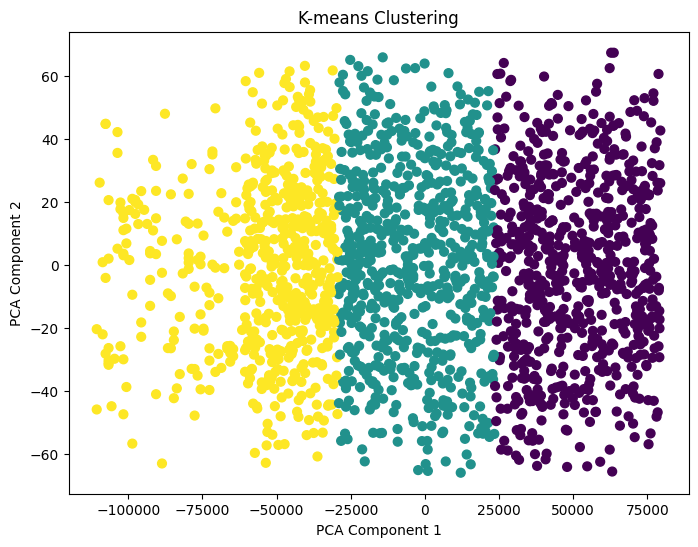

In [15]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data["Cluster"], cmap="viridis", s=40)
plt.title("K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [16]:
data = data[
    [
        "Gender",
        "Age",
        "Annual Income",
        "Spending Score (1-100)",
        "Work Experience",
        "Family Size",
        "Cluster",
        "Profession_Doctor",
        "Profession_Engineer",
        "Profession_Entertainment",
        "Profession_Executive",
        "Profession_Healthcare",
        "Profession_Homemaker",
        "Profession_Lawyer",
        "Profession_Marketing",
    ]
]

In [17]:
data.groupby("Cluster")[["Age", "Annual Income", "Spending Score (1-100)"]].agg(
    ["mean", "min", "max"]
).round(2)

Age         Annual Income                 Spending Score (1-100)  \
          mean min max          mean     min     max                   mean   
Cluster                                                                       
0        48.56   0  99     161825.77  134213  189974                  52.22   
1        50.96   0  99     106315.26   81545  134008                  51.58   
2        47.01   0  99      56272.04       0   81199                  49.37   

                  
        min  max  
Cluster           
0         1  100  
1         1  100  
2         0  100

In [18]:
X = data.drop(columns=["Cluster"])
labels = kmeans.labels

score = silhouette_score(X, labels)
print("Silhouette Score:", score.round(2))

score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", score.round(2))

Silhouette Score: 0.56
Davies-Bouldin Index: 0.56
